# INM427 Neural Computing Coursework

By Hrushik Tadvai, Student number: 170007110

## A Study on diagnosing body variables after heart failure to predict death event using Neural Networks

### section 1.1 Data Preperation

In [1]:
#may need to pip install plotly to view some graphs
# !pip install plotly

In [2]:
import pandas as pd
import plotly.express as px
df = pd.read_csv('/Users/suhruth/Desktop/heart_failure_clinical_records_dataset.csv')

In the cell below it is clear to see that this dataset has no missing variables therefore there is no need to make estimations upon any data

In [3]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [4]:
df.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

The data was mormalised to manipulate the data into having a common range with the data spread remaining the same. This later proved to have booseted accuract in the neural networks.

In [5]:
normalized_df=(df-df.mean())/df.std()
normalized_df

age   anaemia  creatinine_phosphokinase  diabetes  \
0    1.190949 -0.869647                  0.000165 -0.846161   
1   -0.490457 -0.869647                  7.502063 -0.846161   
2    0.350246 -0.869647                 -0.449186 -0.846161   
3   -0.910808  1.146046                 -0.485257 -0.846161   
4    0.350246  1.146046                 -0.434757  1.177856   
..        ...       ...                       ...       ...   
294  0.098035 -0.869647                 -0.536789  1.177856   
295 -0.490457 -0.869647                  1.276075 -0.846161   
296 -1.331160 -0.869647                  1.523425  1.177856   
297 -1.331160 -0.869647                  1.887234 -0.846161   
298 -0.910808 -0.869647                 -0.397655 -0.846161   

     ejection_fraction  high_blood_pressure     platelets  serum_creatinine  \
0            -1.527998             1.356997  1.678834e-02          0.489237   
1            -0.007065            -0.734457  7.523047e-09         -0.284076   
2            -1.527998            -0.734457 -1.036336e+00         -0.090748   
3            -1.527998            -0.734457 -5.455595e-01          0.489237   
4            -1.527998            -0.734457  6.507077e-01          1.262550   
..                 ...                  ...           ...               ...   
294          -0.007065             1.356997 -1.107907e+00         -0.284076   
295          -0.007065            -0.734457  6.791087e-02         -0.187412   
296           1.851853            -0.734457  4.893878e+00         -0.574068   
297          -0.007065            -0.734457 -1.261275e+00          0.005916   
298           0.584409            -0.734457  1.345974e+00          0.199244   

     serum_sodium       sex   smoking      time  DEATH_EVENT  
0       -1.501519  0.734457 -0.686531 -1.626775     1.451727  
1       -0.141739  0.734457 -0.686531 -1.601007     1.451727  
2       -1.728149  0.734457  1.451727 -1.588122     1.451727  
3        0.084892  0.734457 -0.686531 -1.588122     1.451727  
4       -4.674340 -1.356997 -0.686531 -1.575238     1.451727  
..            ...       ...       ...       ...          ...  
294      1.444672  0.734457  1.451727  1.800432    -0.686531  
295      0.538152 -1.356997 -0.686531  1.813317    -0.686531  
296      0.311522 -1.356997 -0.686531  1.903506    -0.686531  
297      0.764782  0.734457  1.451727  1.929275    -0.686531  
298     -0.141739  0.734457  1.451727  1.993696    -0.686531  

[299 rows x 13 columns]

In [6]:
df1 = df[df['DEATH_EVENT'] == 1]
df1.describe()

age    anaemia  creatinine_phosphokinase   diabetes  \
count  96.000000  96.000000                 96.000000  96.000000   
mean   65.215281   0.479167                670.197917   0.416667   
std    13.214556   0.502188               1316.580640   0.495595   
min    42.000000   0.000000                 23.000000   0.000000   
25%    55.000000   0.000000                128.750000   0.000000   
50%    65.000000   0.000000                259.000000   0.000000   
75%    75.000000   1.000000                582.000000   1.000000   
max    95.000000   1.000000               7861.000000   1.000000   

       ejection_fraction  high_blood_pressure      platelets  \
count          96.000000             96.00000      96.000000   
mean           33.468750              0.40625  256381.044792   
std            12.525303              0.49371   98525.682856   
min            14.000000              0.00000   47000.000000   
25%            25.000000              0.00000  197500.000000   
50%            30.000000              0.00000  258500.000000   
75%            38.000000              1.00000  311000.000000   
max            70.000000              1.00000  621000.000000   

       serum_creatinine  serum_sodium        sex    smoking        time  \
count         96.000000     96.000000  96.000000  96.000000   96.000000   
mean           1.835833    135.375000   0.645833   0.312500   70.885417   
std            1.468562      5.001579   0.480771   0.465946   62.378281   
min            0.600000    116.000000   0.000000   0.000000    4.000000   
25%            1.075000    133.000000   0.000000   0.000000   25.500000   
50%            1.300000    135.500000   1.000000   0.000000   44.500000   
75%            1.900000    138.250000   1.000000   1.000000  102.250000   
max            9.400000    146.000000   1.000000   1.000000  241.000000   

       DEATH_EVENT  
count         96.0  
mean           1.0  
std            0.0  
min            1.0  
25%            1.0  
50%            1.0  
75%            1.0  
max            1.0

In [7]:
df1 = df[df['DEATH_EVENT'] == 0]
df1.describe()

age     anaemia  creatinine_phosphokinase    diabetes  \
count  203.000000  203.000000                203.000000  203.000000   
mean    58.761906    0.408867                540.054187    0.418719   
std     10.637890    0.492840                753.799572    0.494569   
min     40.000000    0.000000                 30.000000    0.000000   
25%     50.000000    0.000000                109.000000    0.000000   
50%     60.000000    0.000000                245.000000    0.000000   
75%     65.000000    1.000000                582.000000    1.000000   
max     90.000000    1.000000               5209.000000    1.000000   

       ejection_fraction  high_blood_pressure      platelets  \
count         203.000000           203.000000     203.000000   
mean           40.266010             0.325123  266657.489901   
std            10.859963             0.469579   97531.202283   
min            17.000000             0.000000   25100.000000   
25%            35.000000             0.000000  219500.000000   
50%            38.000000             0.000000  263000.000000   
75%            45.000000             1.000000  302000.000000   
max            80.000000             1.000000  850000.000000   

       serum_creatinine  serum_sodium         sex     smoking        time  \
count        203.000000    203.000000  203.000000  203.000000  203.000000   
mean           1.184877    137.216749    0.650246    0.325123  158.339901   
std            0.654083      3.982923    0.478071    0.469579   67.742872   
min            0.500000    113.000000    0.000000    0.000000   12.000000   
25%            0.900000    135.500000    0.000000    0.000000   95.000000   
50%            1.000000    137.000000    1.000000    0.000000  172.000000   
75%            1.200000    140.000000    1.000000    1.000000  213.000000   
max            6.100000    148.000000    1.000000    1.000000  285.000000   

       DEATH_EVENT  
count        203.0  
mean           0.0  
std            0.0  
min            0.0  
25%            0.0  
50%            0.0  
75%            0.0  
max            0.0

(array([-8., -6., -4., -2.,  0.,  2.,  4.,  6.,  8., 10.]),
 <a list of 10 Text major ticklabel objects>)

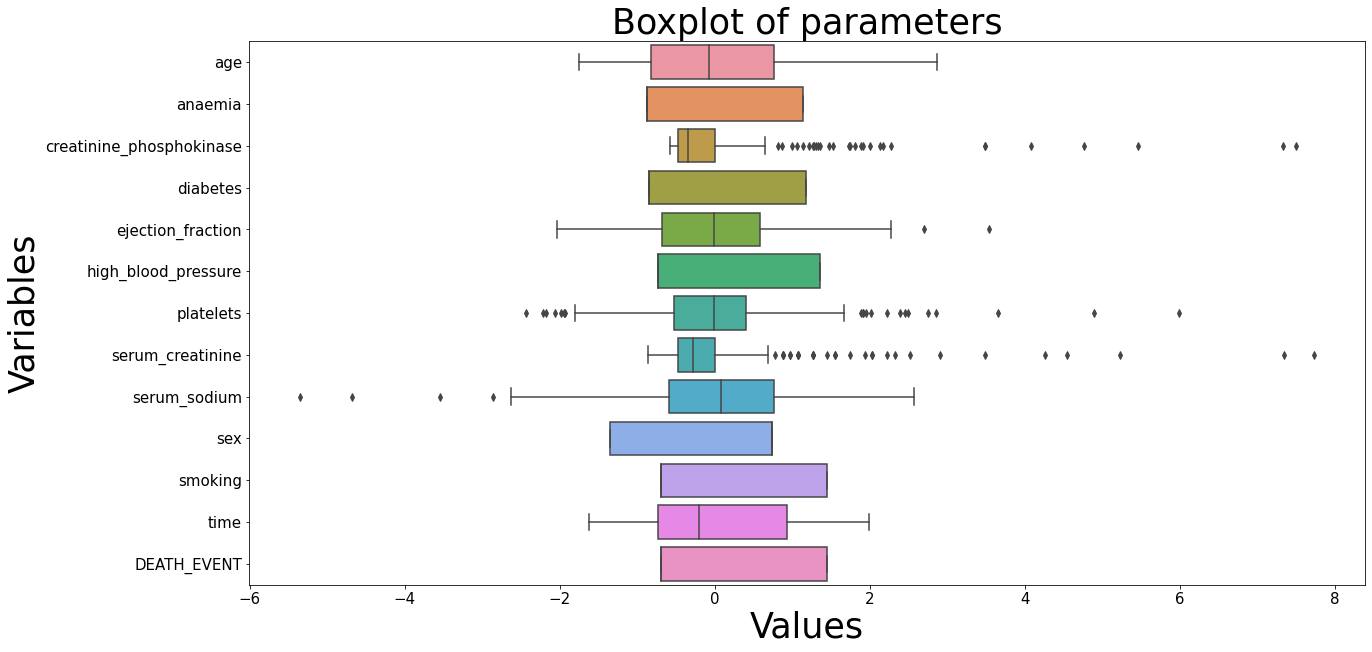

In [8]:
# general visualistions to gauge the spread of parameters across plot
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
sns.boxplot(data=normalized_df, orient="h")
plt.title('Boxplot of parameters',  fontsize = 35)
plt.ylabel('Variables', fontsize = 35)
plt.xlabel('Values', fontsize = 35)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)

<Figure size 2160x1440 with 0 Axes>

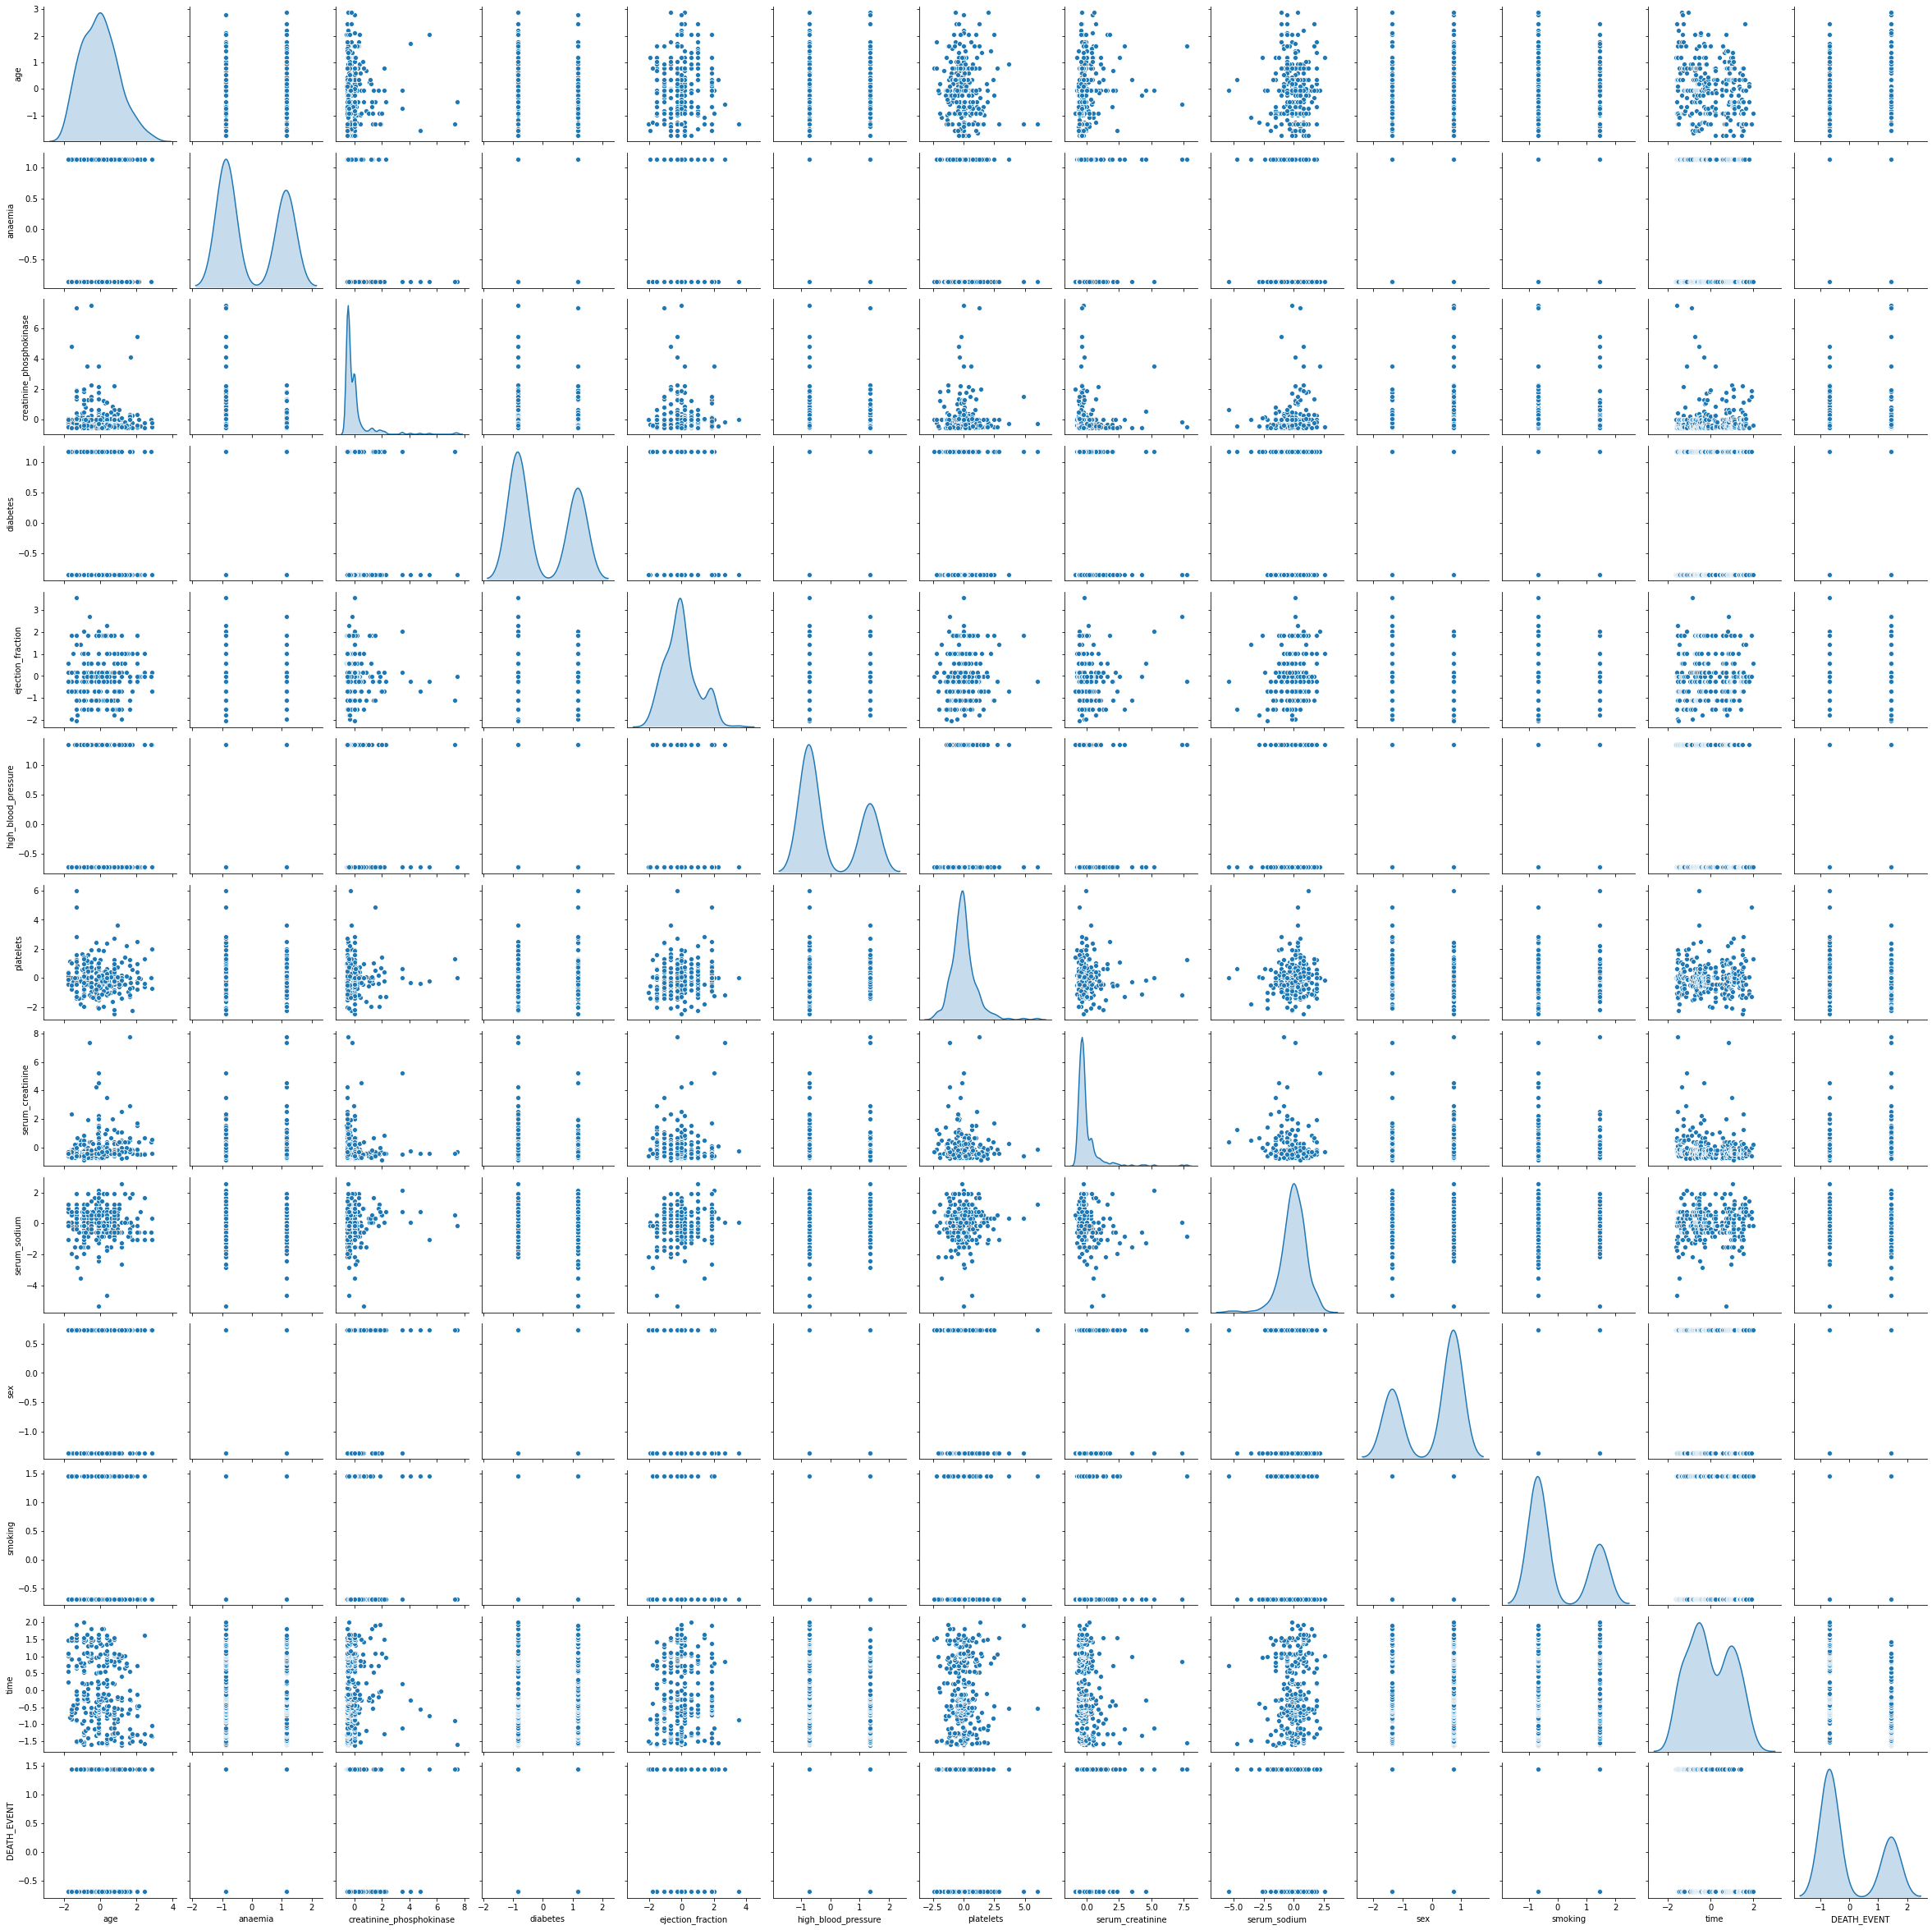

In [9]:
plt.figure(figsize=(30,20))
sns.pairplot(normalized_df,diag_kind='kde')

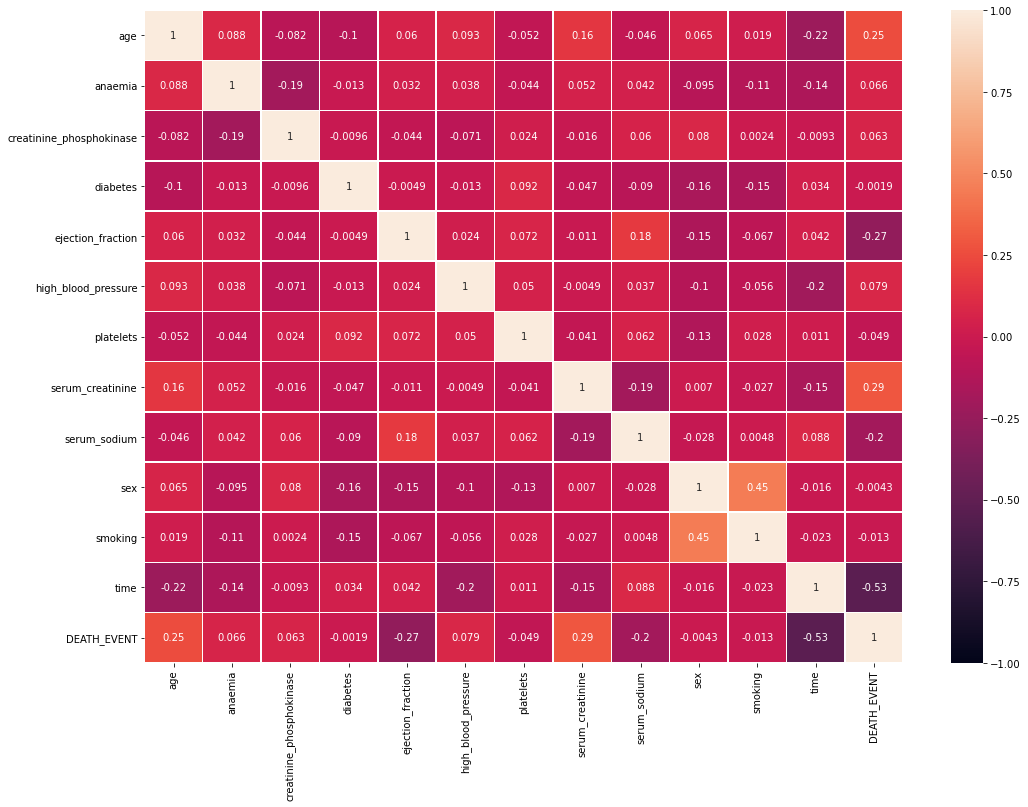

In [10]:
#Correlation matrix to identify which variables strongly correlate with the predictor variable
plt.figure(figsize=(17, 12))
sns.heatmap(normalized_df.corr(),annot=True,vmin=-1,vmax=1,linewidths=.5)

In [11]:
import plotly.express as px
fig = px.pie(df, names='DEATH_EVENT', title='Distribution of Fatality in Patients',width=600, height=400)
fig.show()

#  Support Vector Machine

In [12]:
X = df.iloc[:,:-1]
y = df.iloc[:, -1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 40)

## Model 1 : Linear SVM on untransformed Data

In [13]:
from sklearn.svm import SVC
# create the SVM model with relevant architecture
classifier = SVC(kernel = 'linear', random_state = 3)
# Train Model
classifier.fit(X_train, y_train)
#create predictor set to test
y_pred = classifier.predict(X_test)

In [14]:
from sklearn.metrics import accuracy_score, plot_confusion_matrix
from sklearn.metrics import confusion_matrix
# Create confusion matric
cm = confusion_matrix(y_test, y_pred)
print(cm)
# calculate accuracy score
p4=classifier.predict(X_test)
s4=accuracy_score(y_test,p4)
print(s4)

[[76  7]
 [14 23]]
0.825


76 is the true positive rate where a person is not predicted to die and has infact survived whilst the 23 value is the true negative rate where a predicted fatatiity has indeed come to pass. 7 is the false positive number where a person who was predicted to survive perished whiile 14 is the case where a person is predicted to die but has infact survived.

## Model 2 : Polynomial SVM on untransformed Data

In [15]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'poly', random_state = 3)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [16]:
from sklearn.metrics import accuracy_score, plot_confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
p4=classifier.predict(X_test)
s4=accuracy_score(y_test,p4)
print(s4)

[[83  0]
 [37  0]]
0.6916666666666667


## Model 3 : RBF SVM on untransformed Data 

In [17]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 3)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [18]:
from sklearn.metrics import accuracy_score, plot_confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
p4=classifier.predict(X_test)
s4=accuracy_score(y_test,p4)
print(s4)

[[83  0]
 [37  0]]
0.6916666666666667


## Model 4 : Linear SVM with specified X columns 

these were predicted by correlation matrix in the data exploration section to have greater impact

In [19]:
# take the relevant 4 variables indentified by corr metrix above
X = df[['ejection_fraction', 'serum_creatinine', 'serum_sodium', 'time']]
y = df['DEATH_EVENT']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 40)

In [20]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 3)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [21]:
from sklearn.metrics import accuracy_score, plot_confusion_matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
p4=classifier.predict(X_test)
s4=accuracy_score(y_test,p4)
print(s4)

[[73 10]
 [13 24]]
0.8083333333333333


## Model 5: polynomial model with specified X train columns

In [22]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'poly', random_state = 3)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [23]:
from sklearn.metrics import accuracy_score, plot_confusion_matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
p4=classifier.predict(X_test)
s4=accuracy_score(y_test,p4)
print(s4)

[[78  5]
 [11 26]]
0.8666666666666667


## Model 6 : RBF SVM with specified X columns

In [24]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 3)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [25]:
from sklearn.metrics import accuracy_score, plot_confusion_matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
p4=classifier.predict(X_test)
s4=accuracy_score(y_test,p4)
print(s4)

[[78  5]
 [12 25]]
0.8583333333333333


## Model 7: Normalized Data, Linear Kernel

In [26]:
# Take data from mormalized dataset
X = normalized_df.iloc[:,:-1]
y = df.iloc[:, -1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 40)

In [27]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 3)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [28]:
from sklearn.metrics import accuracy_score, plot_confusion_matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

p4=classifier.predict(X_test)
s4=accuracy_score(y_test,p4)
print(s4)

[[74  9]
 [12 25]]
0.825


## Model 8: Normalized Data, Poly Kernel

In [29]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'poly', random_state = 3)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [30]:
from sklearn.metrics import accuracy_score, plot_confusion_matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
p4=classifier.predict(X_test)
s4=accuracy_score(y_test,p4)
print(s4)

[[82  1]
 [22 15]]
0.8083333333333333


## Model 9: Normalized Data, RBF Kernel

In [31]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 3)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [32]:
from sklearn.metrics import accuracy_score, plot_confusion_matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
p4=classifier.predict(X_test)
s4=accuracy_score(y_test,p4)
print(s4)

[[75  8]
 [14 23]]
0.8166666666666667


## model 10

In [33]:
# Try combination of normalized and targeted selection
X = normalized_df[['ejection_fraction', 'serum_creatinine', 'serum_sodium', 'time']]
y = df['DEATH_EVENT']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 40)

In [34]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'poly', random_state = 1)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [35]:
from sklearn.metrics import accuracy_score, plot_confusion_matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
p4=classifier.predict(X_test)
s4=accuracy_score(y_test,p4)
print(s4)

[[76  7]
 [14 23]]
0.825


best model is model 4 with 86.67 percent accuracy

In [36]:
X = df[['ejection_fraction', 'serum_creatinine', 'serum_sodium', 'time']]
y = df['DEATH_EVENT']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 40)

In [37]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'poly', random_state = 3)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [38]:
from sklearn.metrics import accuracy_score, plot_confusion_matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

p4=classifier.predict(X_test)
s4=accuracy_score(y_test,p4)
print(s4)

[[78  5]
 [11 26]]
0.8666666666666667


In [39]:
# Simple histogram to compare true values and falsely predicted values for each classifier output
fig_hist = px.histogram(
    x=y_pred, color=y_test, nbins=50,
    labels=dict(color='True Labels', x='Score')
)

fig_hist.show()

In [40]:
# Calculate the AUC value to jude effectiveness of model for each classifier output and plor a roc curve
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

fig = px.area(
    x=fpr, y=tpr,
    title=f'ROC Curve (AUC={auc(fpr, tpr):.4f})',
    labels=dict(x='False Positive Rate', y='True Positive Rate'),
    width=700, height=500
)
fig.add_shape(
    type='line', line=dict(dash='dash'),
    x0=0, x1=1, y0=0, y1=1
)

fig.update_yaxes(scaleanchor="x", scaleratio=1)
fig.update_xaxes(constrain='domain')
fig.show()

In [41]:
# cross validation test to further test the model
from sklearn.model_selection import cross_validate
scores = cross_validate(classifier, X, y, scoring='accuracy', cv=5)
scores

{'fit_time': array([0.00803399, 0.00678396, 0.01001406, 0.02978611, 0.00869823]),
 'score_time': array([0.00640583, 0.01726007, 0.00408506, 0.0072279 , 0.00426078]),
 'test_score': array([0.61666667, 0.93333333, 0.91666667, 0.7       , 0.6779661 ])}

# Neural Network classifier

In [42]:
import numpy as np
df = df.astype(np.float32)
normalized_df=(df-df.mean())/df.std()

In [43]:
import numpy as np
import torch
from torch import nn
import torch.nn.functional as F
device = 'cpu'

In [44]:
# Testing found below is the best input to use for accuacy. To be used in neural networks data had to be in 
#numpy format
x = normalized_df[['ejection_fraction', 'serum_creatinine', 'serum_sodium', 'time']].to_numpy()
#x = normalized_df[normalized_df.columns[:-1]].to_numpy()
x

array([[-1.5279986 ,  0.48923677, -1.5015179 , -1.6267748 ],
       [-0.00706478, -0.2840758 , -0.1417372 , -1.6010063 ],
       [-1.5279986 , -0.09074771, -1.7281481 , -1.588122  ],
       ...,
       [ 1.8518542 , -0.574068  ,  0.31152305,  1.9035058 ],
       [-0.00706478,  0.00591638,  0.7647833 ,  1.9292743 ],
       [ 0.5844095 ,  0.19924459, -0.1417372 ,  1.9936955 ]],
      dtype=float32)

In [45]:
q = df['DEATH_EVENT'].to_numpy()
w = q.astype('int64')
y = torch.from_numpy(w)
y

tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
        1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
        0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [46]:
x_dim = x.shape[1] #input dimension has to be same as x
hidden_dim = int(2) #dimension of 2 was found to be most effective
output_dim = len(np.unique(y))

In [47]:
class ClassifierModule(nn.Module):
    def __init__(
            self,
            input_dim=x_dim,
            hidden_dim=hidden_dim,
            output_dim=output_dim,
            #dropout=0.5,
    ):
        super(ClassifierModule, self).__init__()
        #self.dropout = nn.Dropout(dropout)

        self.hidden = nn.Linear(input_dim, hidden_dim,1)
        self.output = nn.Linear(hidden_dim, output_dim,1)

    def forward(self, X, **kwargs):
        X = F.relu(self.hidden(X))
        #X = self.dropout(X)
        X = F.softmax(self.output(X), dim=-1)
        return X

In [48]:
ClassifierModule = ClassifierModule()
print(ClassifierModule)

ClassifierModule(
  (hidden): Linear(in_features=4, out_features=2, bias=True)
  (output): Linear(in_features=2, out_features=2, bias=True)
)


In [49]:
pip install skorch

Note: you may need to restart the kernel to use updated packages.


In [50]:
from skorch import NeuralNetClassifier

In [51]:
torch.manual_seed(0)
#epoch was decided to be 500 as dataset converges overa period of time and 500 was deemed to be enough to get
#a good value

# learning rate had to be low to prevent it converging to much at first points which gave incorrect estimations
net = NeuralNetClassifier(
    ClassifierModule,
    max_epochs=500,
    lr=0.1,
    device=device,
)

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=42)

In [53]:
net.fit(X_train, y_train);

  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        0.7734       0.3333        0.7587  0.0355
      2        0.7545       0.3667        0.7385  0.0114
      3        0.7368       0.3667        0.7187  0.0094
      4        0.7205       0.4333        0.7000  0.0085
      5        0.7054       0.5000        0.6826  0.0086
      6        0.6914       0.5333        0.6660  0.0238
      7        0.6779       0.6333        0.6502  0.0104
      8        0.6652       0.7000        0.6354  0.0120
      9        0.6534       0.7000        0.6215  0.0110
     10        0.6424       0.7000        0.6082  0.0081
     11        0.6318       0.7667        0.5952  0.0174
     12        0.6216       0.7667        0.5826  0.0061
     13        0.6119       0.8000        0.5706  0.0064
     14        0.6029       0.8000        0.5590  0.0169
     15        0.5945       0.8000        0.5479  0.0173
     16        0.5867       0.7

In [54]:
y_pred = net.predict(X_test)

In [55]:
accuracy_score(y_test, y_pred)

0.7733333333333333

In [56]:
# test to see if early stopping improves model
from skorch.callbacks import EarlyStopping
net = NeuralNetClassifier(
    ClassifierModule,
    lr=0.1,
    max_epochs=500,
    callbacks=[EarlyStopping()],
)

In [57]:
net.fit(X_train, y_train);

  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        0.3258       0.9667        0.1431  0.0058
      2        0.3258       0.9667        0.1432  0.0055
      3        0.3258       0.9667        0.1431  0.0051
      4        0.3257       0.9667        0.1430  0.0058
      5        0.3257       0.9667        0.1431  0.0057
      6        0.3257       0.9667        0.1430  0.0059
      7        0.3257       0.9667        0.1429  0.0069
      8        0.3256       0.9667        0.1430  0.0060
      9        0.3256       0.9667        0.1429  0.0056
     10        0.3256       0.9667        0.1428  0.0059
     11        0.3256       0.9667        0.1427  0.0058
     12        0.3256       0.9667        0.1428  0.0056
     13        0.3256       0.9667        0.1427  0.0056
     14        0.3255       0.9667        0.1426  0.0057
     15        0.3255       0.9667        0.1426  0.0040
     16        0.3255       0.9

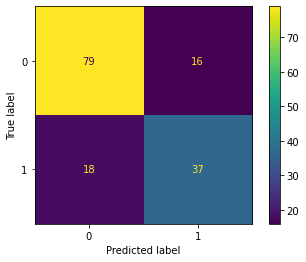

In [58]:
from sklearn.metrics import accuracy_score, plot_confusion_matrix
plot_confusion_matrix(net, X_test, y_test)

In [59]:
# Cross validation test
from sklearn.model_selection import cross_validate
scores = cross_validate(net, x, y, scoring='accuracy', cv=5)

  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        0.3644       0.8333        0.4398  0.0120
      2        0.3507       0.8333        0.4473  0.0096
      3        0.3400       0.8125        0.4561  0.0083
      4        0.3313       0.8125        0.4648  0.0091
      5        0.3245       0.7917        0.4732  0.0091
Stopping since valid_loss has not improved in the last 5 epochs.
  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        0.3684       0.8125        0.4729  0.0069
      2        0.3575       0.8125        0.4846  0.0095
      3        0.3487       0.7917        0.4956  0.0089
      4        0.3422       0.7708        0.5059  0.0091
      5        0.3373       0.7708        0.5155  0.0122
Stopping since valid_loss has not improved in the last 5 epochs.
  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------

In [60]:
fig_hist = px.histogram(
    x=y_pred, color=y_test, nbins=50,
    labels=dict(color='True Labels', x='Score')
)

fig_hist.show()

In [61]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

fig = px.area(
    x=fpr, y=tpr,
    title=f'ROC Curve (AUC={auc(fpr, tpr):.4f})',
    labels=dict(x='False Positive Rate', y='True Positive Rate'),
    width=700, height=500
)
fig.add_shape(
    type='line', line=dict(dash='dash'),
    x0=0, x1=1, y0=0, y1=1
)

fig.update_yaxes(scaleanchor="x", scaleratio=1)
fig.update_xaxes(constrain='domain')
fig.show()